In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 한글 처리때문에 넣은 코드
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data = {'aa':10,'bb':20,'cc':30,'dd':40, 'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [5]:
sr.max()

50

In [6]:
sr.min()

10

In [7]:
# numpy의 argmax랑 같음 가장 큰값의 인덱스
sr.idxmax()

'ee'

In [8]:
sr.idxmin()

'aa'

In [9]:
# 45이하인 데이터의 가장큰값
sr[sr<=45].max()

40

In [11]:
sr.head(2)

aa    10
bb    20
Name: 국어점수, dtype: int64

In [12]:
sr.tail(2)

dd    40
ee    50
Name: 국어점수, dtype: int64

In [13]:
# 값이 가장 높은순으로 2개 출력
sr.nlargest(2)

ee    50
dd    40
Name: 국어점수, dtype: int64

In [14]:
sr['cc'] = 40

In [15]:
sr

aa    10
bb    20
cc    40
dd    40
ee    50
Name: 국어점수, dtype: int64

In [18]:
# cc 랑 dd가 둘다 40인데 cc만 나오는 이유는 keep인자가 first라서
sr.nlargest(2,keep='all')

ee    50
cc    40
dd    40
Name: 국어점수, dtype: int64

In [19]:
# 가장 낮은값 2개를 낮은 순서로
sr.nsmallest(2,keep = 'all')

aa    10
bb    20
Name: 국어점수, dtype: int64

In [20]:
sr.sum()

160

In [21]:
sr.mean()

32.0

In [45]:
sr.std()

16.431676725154983

In [22]:
sr.median()

40.0

In [24]:
sr.quantile([0.25,0.5,0.75])

0.25    20.0
0.50    40.0
0.75    40.0
Name: 국어점수, dtype: float64

In [25]:
# 중복을 제거하고 1번씩나온값만 출력
sr.unique()

array([10, 20, 40, 50], dtype=int64)

In [26]:
# 값의 중복갯수를 알려줌 각각의 데이터가 몇개나있는지
sr.value_counts()

40    2
20    1
10    1
50    1
Name: 국어점수, dtype: int64

In [33]:
def fn(v):
#     print('v==',v)
#     print('==========')
#     if v >30 :
#         return v+1
#     else :
#         return v+2
    return v+1 if v>30 else v+2

In [34]:
sr.apply(fn)

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [35]:
# 람다식에서 lambda 값 : 리턴값 조건 else else조건의값
sr.apply(lambda v:v+1 if v>30 else v+2)

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [37]:
# 국어점수가 40점이상이면 '합격' 아니면 '불합격'으로 구하시오
sr.apply(lambda v:'합격' if v>=40 else '불합격')

aa    불합격
bb    불합격
cc     합격
dd     합격
ee     합격
Name: 국어점수, dtype: object

In [38]:
# pd.cut(인자,나눌개수) 인자로 받은것을 나눌개수가 주어진만큼 계급을 나눈다
pd.cut(sr,5)
# 9.96 < aa <= 18.0
# 18.0 < bb <= 26.0

aa    (9.96, 18.0]
bb    (18.0, 26.0]
cc    (34.0, 42.0]
dd    (34.0, 42.0]
ee    (42.0, 50.0]
Name: 국어점수, dtype: category
Categories (5, interval[float64]): [(9.96, 18.0] < (18.0, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 50.0]]

In [41]:
pd.cut(sr,5).value_counts().sort_index()

(9.96, 18.0]    1
(18.0, 26.0]    1
(26.0, 34.0]    0
(34.0, 42.0]    2
(42.0, 50.0]    1
Name: 국어점수, dtype: int64

In [44]:
pd.cut(sr,[0,20,40,60])
# 0< aa <= 20
# 0< bb <= 20
# 20< cc <= 40
pd.cut(sr,[0,20,40,60]).value_counts().sort_index()

(0, 20]     2
(20, 40]    2
(40, 60]    1
Name: 국어점수, dtype: int64

In [47]:
pd.cut(sr,[0,20,40,60],labels = ['C','B','A'])

aa    C
bb    C
cc    B
dd    B
ee    A
Name: 국어점수, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [48]:
sr.to_csv('a.csv')

In [49]:
# 디폴트 값은밸류만 출력
for n in sr:
    print(n)

10
20
40
40
50


In [50]:
# 인덱스를 출력하소싶으면 sr.index 출력
for n in sr.index:
    print(n)

aa
bb
cc
dd
ee


In [51]:
# 키 밸류값 둘다 출력
for n in sr.items():
    print(n)

('aa', 10)
('bb', 20)
('cc', 40)
('dd', 40)
('ee', 50)


In [52]:
# 언패킹
for n,v in sr.items():
    print(n,v)

aa 10
bb 20
cc 40
dd 40
ee 50


# 시각화

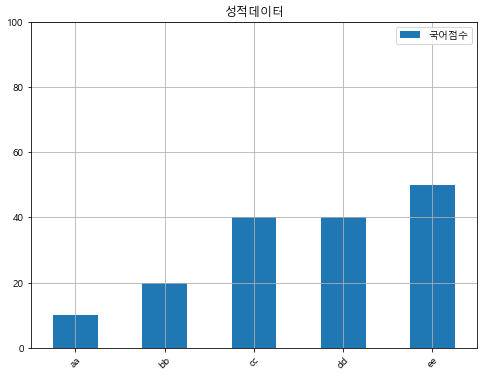

In [61]:
# rot x축목록의 글자 각도를 바꿈
sr.plot(kind = 'bar',figsize = (8,6),title = '성적데이터',
       legend = True,grid = True,ylim = (0,100),rot = 45)
plt.show()

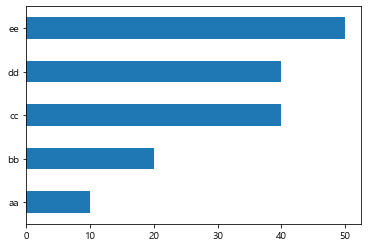

In [63]:
sr.plot(kind = 'barh')
plt.show()

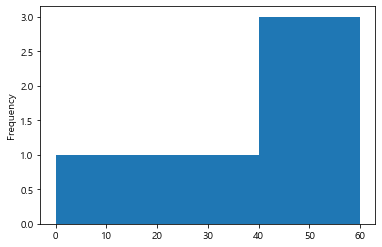

In [68]:
sr.plot(kind = 'hist',bins = [0,20,40,60])
plt.show()

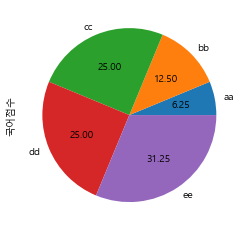

In [74]:
sr.plot(kind = 'pie',autopct = '%.2f')
plt.show()

In [72]:
sr.sum()

160

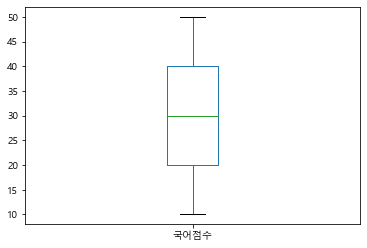

In [5]:
sr.plot(kind = 'box')
plt.show()

In [6]:
sr.quantile([0.25,0.5,0.75])

0.25    20.0
0.50    30.0
0.75    40.0
Name: 국어점수, dtype: float64